# **Titanic: Machine Learning from Disaster**

### *Goal:*
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.


### Libraries

In [1]:
import pandas as pd
import numpy as np
from os import getcwd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#'/home/jesus/Documents/projects/kaggle'
df_train = pd.read_csv(getcwd() +'/input_data/train.csv')
df_test = pd.read_csv(getcwd() +'/input_data/test.csv')

## Metadata tables
| Variable | Definition | Key |
| :-- | :-- | :-- |
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

&nbsp;

***Variable notes***
&nbsp;

&nbsp;

**pclass:** A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower
&nbsp;

&nbsp;

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
&nbsp;

&nbsp;

**sibsp:** The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)
&nbsp;

&nbsp;

**parch:** The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
df_train.info(), print('-'*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------------------------------------------------------------------


(None, None)

# Convert variables in type indicate
 *   PassengerId  It isn't interesting (only for identify individual) 
 *   Survived     target  categorical
 *   Pclass       categorical ordinal
 *   Name         It isn't interesting 
 *   Sex           categorical nominal
 *   Age           categorical ordinal (Complete na's and bins)
 *   SibSp         categorical ordinal
 *   Parch         categorical ordinal
 *   Ticket       It isn't interesting 
 *   Fare          numerical
 *  Cabin         It isn't Interesting 
 *  Embarked      categorical nominal  (complete na category)

In [6]:
# select interest variables: 
id_variable = "PassengerId"
target_var = "Survived"
predictor_vars_num = ["Fare"]
predictor_vars_cat = ["Pclass","Sex", "SibSp", "Parch", "Embarked"]

df = pd.DataFrame()

In [7]:
df[id_variable] = df_train[id_variable]

# target no, because is a binary response 
df[target_var] = df_train[target_var].astype("category")

# add numerical variable 
df[predictor_vars_num] = df_train[predictor_vars_num]

# create levels for age 
bins = range(0,150,10)
df['age_bins'] = pd.cut(df_train['Age'], bins)
df['age_bins'] = df['age_bins'].cat.add_categories("No report").fillna("No report")
df['age_bins'] = df['age_bins'].astype(str).astype('category')


#create levels for other variables
for column in  predictor_vars_cat:
    df[column] = df_train[column].astype("category")
    df[column] = df[column] .cat.add_categories("No report").fillna("No report")

    # add age_bins category list
predictor_vars_cat.append('age_bins')

df.head(10)

,PassengerId,Survived,Fare,age_bins,Pclass,Sex,SibSp,Parch,Embarked
0,1,0,7.2500,"(20, 30]",3,male,1,0,S
1,2,1,71.2833,"(30, 40]",1,female,1,0,C
2,3,1,7.9250,"(20, 30]",3,female,0,0,S
3,4,1,53.1000,"(30, 40]",1,female,1,0,S
4,5,0,8.0500,"(30, 40]",3,male,0,0,S
5,6,0,8.4583,No report,3,male,0,0,Q
6,7,0,51.8625,"(50, 60]",1,male,0,0,S
7,8,0,21.0750,"(0, 10]",3,male,3,1,S
8,9,1,11.1333,"(20, 30]",3,female,0,2,S
9,10,1,30.0708,"(10, 20]",2,female,1,0,C


# Univariate Analysis

In [8]:
def bar_plot(df, variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    var_table = df[variable]
    var_table = var_table.value_counts().reset_index()
    var_table.columns = [variable, 'percentage' ]
    var_table['percentage'] = round(var_table['percentage'] / var_table['percentage'].sum() * 100)
    
    g = sns.barplot(x = variable, y = 'percentage', data = var_table)
    g.set_title("Hist "+ variable)
    plt.setp(g.get_xticklabels(), rotation=90)
    plt.show()
    
    print("{}: \n {}".format(variable,var_table))

In [9]:
def df_hist(df, variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

    
    plt.show()

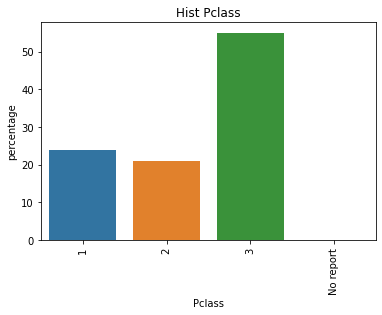

Pclass: 
       Pclass  percentage
0          3        55.0
1          1        24.0
2          2        21.0
3  No report         0.0


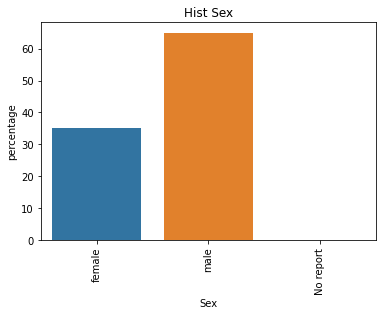

Sex: 
          Sex  percentage
0       male        65.0
1     female        35.0
2  No report         0.0


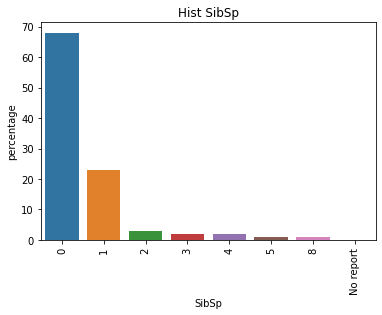

SibSp: 
        SibSp  percentage
0          0        68.0
1          1        23.0
2          2         3.0
3          4         2.0
4          3         2.0
5          8         1.0
6          5         1.0
7  No report         0.0


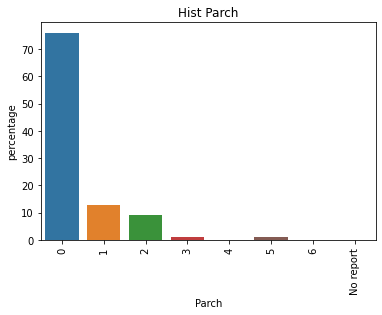

Parch: 
        Parch  percentage
0          0        76.0
1          1        13.0
2          2         9.0
3          5         1.0
4          3         1.0
5          4         0.0
6          6         0.0
7  No report         0.0


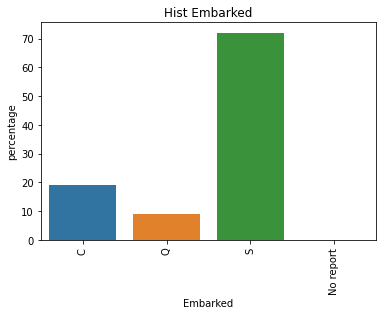

Embarked: 
     Embarked  percentage
0          S        72.0
1          C        19.0
2          Q         9.0
3  No report         0.0


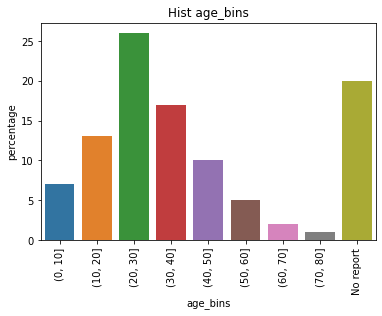

age_bins: 
     age_bins  percentage
0   (20, 30]        26.0
1  No report        20.0
2   (30, 40]        17.0
3   (10, 20]        13.0
4   (40, 50]        10.0
5    (0, 10]         7.0
6   (50, 60]         5.0
7   (60, 70]         2.0
8   (70, 80]         1.0


In [10]:
for c in predictor_vars_cat:
    bar_plot(df, c)

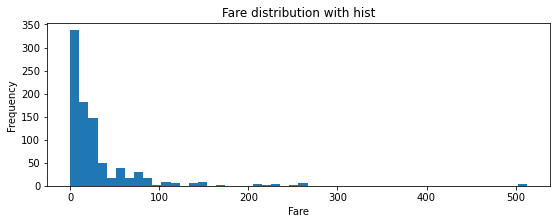

In [11]:
for c in predictor_vars_num:
    df_hist(df, c)

# Reorganize categories
### SibSp and Parch

### We categorize Fare variable by quantiles

In [12]:
bins = df['Fare'].quantile([0,0.25, .5,.75,1]).tolist()
bins[0] =-1
df['fare_bins'] = pd.cut(df_train['Fare'], bins)
df['fare_bins'] = df['fare_bins'].cat.add_categories("No report").fillna("No report")
df['fare_bins'] = df['fare_bins'].astype(str).astype('category')

predictor_vars_cat.append('fare_bins')


In [13]:
# Categorical variables
df['SibSp'] = df['SibSp'].astype(str)
df.loc[~df['SibSp'].isin(['0','1']),'SibSp'] = '>=2'
df['SibSp'] = df['SibSp'].astype("category")
df['SibSp'] = df['SibSp'] .cat.add_categories("No report").fillna("No report")

df['Parch'] = df['Parch'].astype(str)
df.loc[~df['Parch'].isin(['0','1','2']), 'Parch'] = '>=3'
df['Parch'] = df['Parch'].astype("category")
df['Parch'] = df['Parch'] .cat.add_categories("No report").fillna("No report")


# Analize with target variable

In [14]:
def countplot_survived (df, target, variable):
    g= sns.countplot(x=target ,hue=variable , data=df)
    g.set_title("Hist "+ variable)
    plt.show()

In [15]:
def heatmap_survived(df, target, variable):
    print(pd.crosstab(df[variable], df[target]))
    aux = pd.crosstab(df[variable], df[target]).apply(lambda r: round(r/r.sum() *100,0), axis=0)
    aux2 = pd.crosstab(df[variable], df[target]).apply(lambda r: round(r/r.sum() *100,1), axis=1)
    fig , axs = plt.subplots(ncols=2)
    fig.subplots_adjust(wspace=2)
    sns.heatmap(aux, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', ax=axs[0])
    sns.heatmap(aux2, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', ax=axs[1])
    axs[0].set_title('Distribution '+ target + ' by ' + variable)
    axs[1].set_title('Distribution '+ variable + ' by ' + target)
    plt.show()

In [16]:
def kdeplot_survived(df, target, variable):
    g = sns.kdeplot(df[variable][(df[target] == 0) & (df[variable].notnull())], color="Red", shade = True)
    g = sns.kdeplot(df[variable][(df[target] == 1) & (df[variable].notnull())], ax = g, color="green", shade = True)
    g.set_xlabel(variable)
    g.set_ylabel("Frequency")
    g = g.legend(["Not Survived","Survived"])



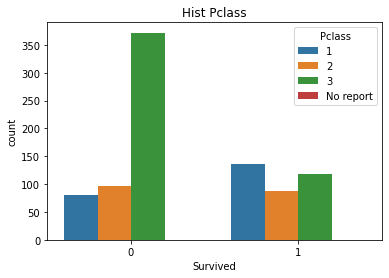

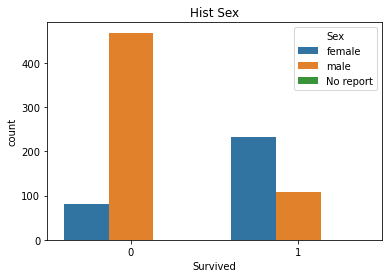

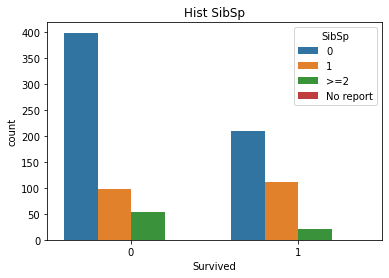

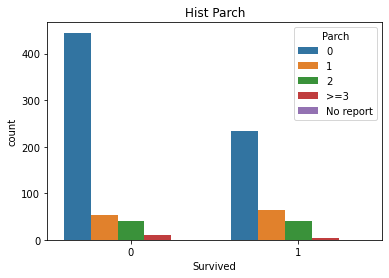

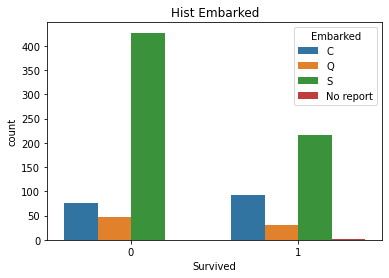

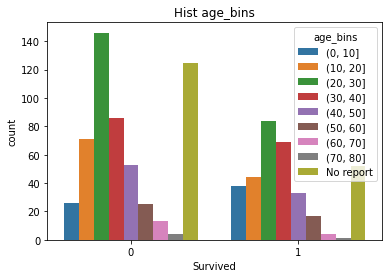

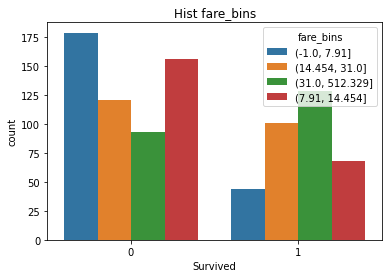

In [17]:
for c in predictor_vars_cat:
    countplot_survived(df, target_var, c)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


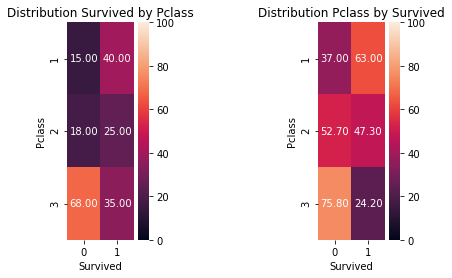

Survived    0    1
Sex               
female     81  233
male      468  109


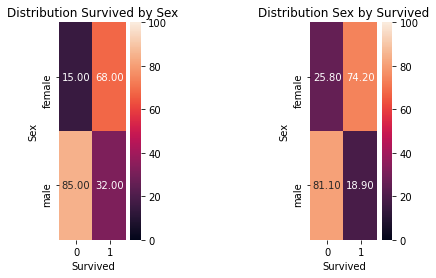

Survived    0    1
SibSp             
0         398  210
1          97  112
>=2        54   20


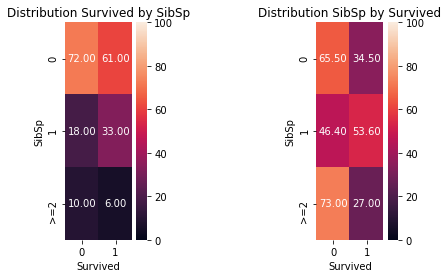

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
>=3        11    4


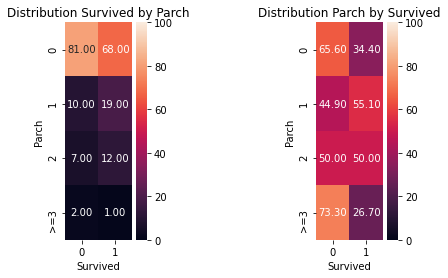

Survived     0    1
Embarked           
C           75   93
Q           47   30
S          427  217
No report    0    2


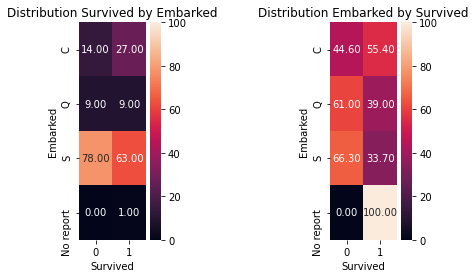

Survived     0   1
age_bins          
(0, 10]     26  38
(10, 20]    71  44
(20, 30]   146  84
(30, 40]    86  69
(40, 50]    53  33
(50, 60]    25  17
(60, 70]    13   4
(70, 80]     4   1
No report  125  52


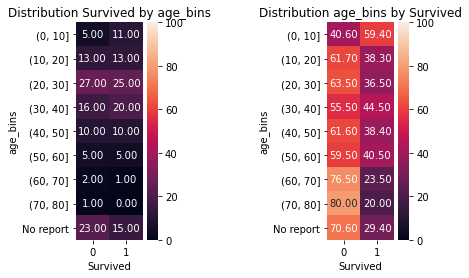

Survived           0    1
fare_bins                
(-1.0, 7.91]     179   44
(14.454, 31.0]   121  101
(31.0, 512.329]   93  129
(7.91, 14.454]   156   68


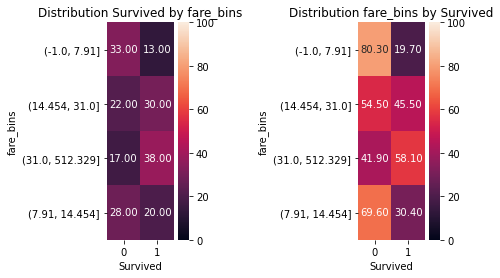

In [18]:
for c in predictor_vars_cat:
    heatmap_survived(df, target_var, c)

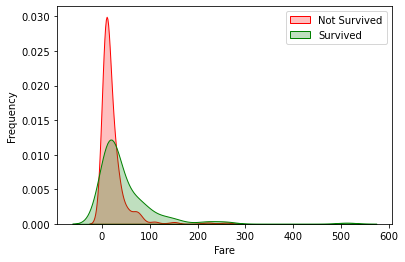

In [19]:
for c in predictor_vars_num:
    kdeplot_survived(df, target_var, c)

# Data Imputation

In [22]:
df

,PassengerId,Survived,Fare,age_bins,Pclass,Sex,SibSp,Parch,Embarked,fare_bins
0,1,0,7.2500,"(20, 30]",3,male,1,0,S,"(-1.0, 7.91]"
1,2,1,71.2833,"(30, 40]",1,female,1,0,C,"(31.0, 512.329]"
2,3,1,7.9250,"(20, 30]",3,female,0,0,S,"(7.91, 14.454]"
3,4,1,53.1000,"(30, 40]",1,female,1,0,S,"(31.0, 512.329]"
4,5,0,8.0500,"(30, 40]",3,male,0,0,S,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...
886,887,0,13.0000,"(20, 30]",2,male,0,0,S,"(7.91, 14.454]"
887,888,1,30.0000,"(10, 20]",1,female,0,0,S,"(14.454, 31.0]"
888,889,0,23.4500,No report,3,female,1,2,S,"(14.454, 31.0]"
889,890,1,30.0000,"(20, 30]",1,male,0,0,C,"(14.454, 31.0]"


In [23]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (4, object): ['C', 'Q', 'S', 'No report']

# Building models